# Et kredsløb der kan identificere og rette op til en enkelt bitflip-fejl

Vi får brug for fem qubits i fejlretningskredsløbet og to bits. Vi koder én logisk qubit i form af tre fysiske qubits - en såkaldt repetitionskode. De to resterende qubits bruges til at identificere fejlsyndromet.

1) Gør klar til fem qubits og to bits i kredsløbet. Bemærk: alle qubits skal starte i tilstanden $\ket{0}$, for at fejlretningskredsløbet vil virke. Det gælder dog ikke q<sub>0</sub>, som er den qubit, vi koder.

In [49]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(5, 2)

2) Lav kodningen af q<sub>0</sub>. Vi kan skrive tilstanden af q<sub>0</sub> som $\alpha \ket{0} + \beta \ket{1}$. Nedenstående kredsløb laver så tilstanden $\alpha \ket{000} + \beta \ket{111}$ for de tre første qubits.

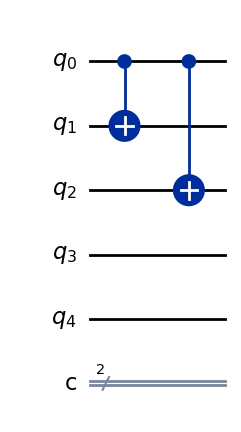

In [50]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw("mpl")

3) Introducér en bitflip-fejl tilfældigt hos en af de tre qubits i repetitionskoden. Hvis fejlen f.eks. sker hos q<sub>0</sub>, så vil den resulterende tilstand for de tre første qubits blive $\alpha \ket{001} + \beta \ket{110}$.

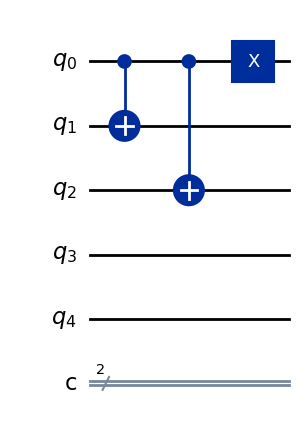

In [51]:
from random import randint
r = randint(0, 2)
qc.barrier()
qc.x(r)
qc.draw("mpl", plot_barriers = 0)

4) Gør klar til at identificere fejlsyndromet. Der er sket en fejl, hvis pariteten ikke er den samme mellem alle tre qubits i repetitionskoden. I q<sub>3</sub> bliver pariteten af q<sub>0</sub> og q<sub>1</sub> tjekket: hvis q<sub>0</sub> og q<sub>1</sub> har samme paritet, så vil q<sub>3</sub> forblive i $\ket{0}$-tilstanden. Ellers vil q<sub>3</sub> komme i $\ket{1}$-tilstanden. I q<sub>4</sub> tjekkes pariteten af q<sub>1</sub> og q<sub>2</sub> tilsvarende.

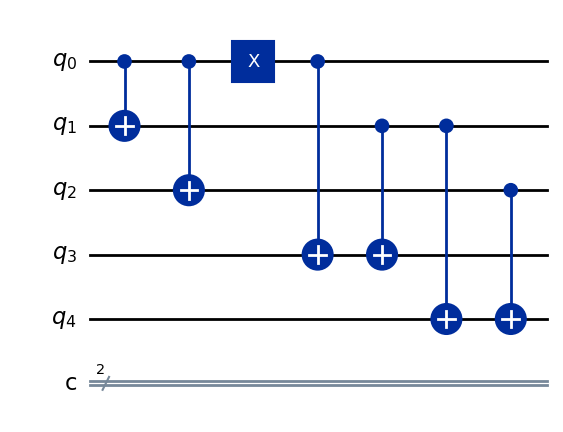

In [52]:
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(1, 4)
qc.cx(2, 4)
qc.draw("mpl", plot_barriers = 0)

5) Foretag målinger af q<sub>3</sub> og q<sub>4</sub> for at identificere fejlsyndromet.

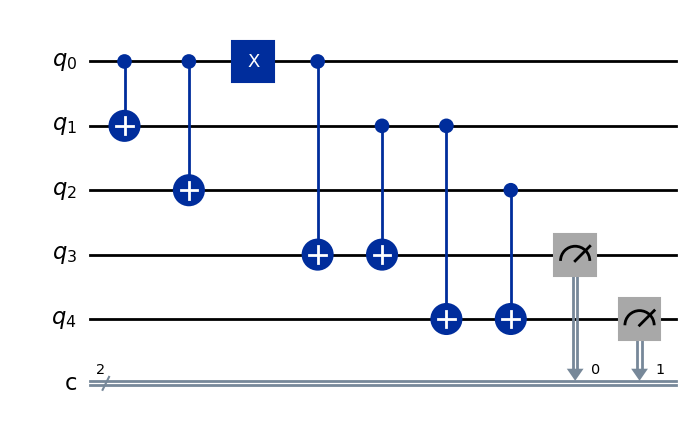

In [53]:
qc.barrier()
qc.measure(3, 0)
qc.measure(4, 1)
qc.draw("mpl", plot_barriers = 0)

6) Simulér kredsløbet og ret fejlen afhængigt af fejlsyndromet.
Fejlsyndromer:
* 00: Ingen fejl.
* 01: Bitflip hos q<sub>0</sub>.
* 11: Bitflip hos q<sub>1</sub>.
* 10: Bitflip hos q<sub>2</sub>.


Fejlsyndrom: 01


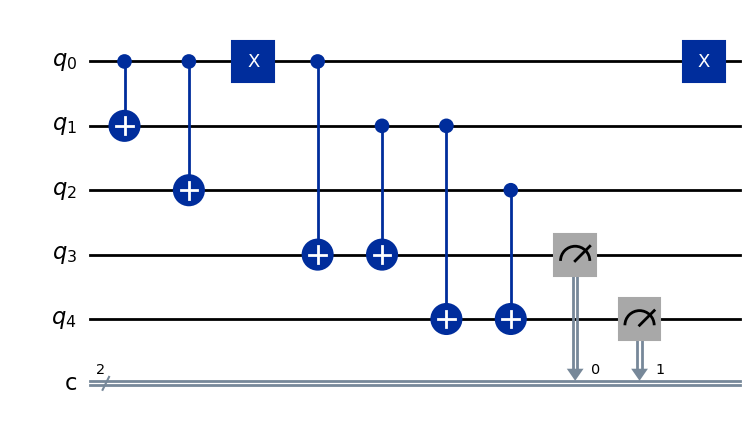

In [54]:
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run(2 * [qc], [Pauli("ZIIII"), Pauli("IZIII")], shots = 1)
syndrome = str(int(1 - job.result().values[0] / 2)) + str(int(1 - job.result().values[1] / 2))
print("Fejlsyndrom:", syndrome)

qc.barrier()
if syndrome == "01":
    qc.x(0)
elif syndrome == "11":
    qc.x(1)
elif syndrome == "10":
    qc.x(2)

qc.draw("mpl", plot_barriers = 0)


# Nu har vi identificeret og rettet bitflip-fejlen uden at kollapse tilstanden, som q<sub>0</sub> er i.